In [13]:
import pandas as pd
import glob

# Lista para almacenar los DataFrames
dataframes = []

# Leer y almacenar cada archivo en la lista
for year in range(2017, 2025):
    archivo = f'./ActuacionesBomberos_{year}.xlsx'
    df = pd.read_excel(archivo)
    dataframes.append(df)

# Combinar todos los DataFrames en uno solo
df_combinado = pd.concat(dataframes, ignore_index=True)

#Borraar filas vacias
df_combinado = df_combinado.dropna(subset=['DISTRITO'])

#Visualizacion
print(df_combinado.describe())

# Guardar el DataFrame combinado en un nuevo archivo Excel
df_combinado.to_excel(f'ActuacionesBomberos_2017_2024.xlsx', index=False)


               AÑO       FUEGOS  DAÑOS EN CONSTRUCCION  \
count  1732.000000  1732.000000            1732.000000   
mean   2020.429561    19.514434               7.125866   
std       1.963916    12.701448               8.372625   
min    2017.000000     0.000000               0.000000   
25%    2019.000000    11.000000               2.000000   
50%    2020.000000    17.000000               5.000000   
75%    2022.000000    26.000000               9.000000   
max    2024.000000    92.000000             160.000000   

       SALVAMENTOS Y RESCATES  DAÑOS POR AGUA  INCIDENTES DIVERSOS  \
count             1732.000000     1732.000000          1732.000000   
mean                22.524827        8.693418            23.903002   
std                 12.688508        6.506727            17.279028   
min                  0.000000        0.000000             0.000000   
25%                 14.000000        4.000000            12.000000   
50%                 21.000000        7.000000            

Metodos Parametricos

Fuegos en el centro descripción
count    78.000000
mean     31.641026
std      11.120327
min       9.000000
25%      24.250000
50%      30.000000
75%      38.000000
max      68.000000
Name: fuegos, dtype: float64
95% CI para fuegos en Centro: (29.133779321048202, 34.14827196100308)
///////////////////////////
Centro total accidentes descripcion
count     78.000000
mean     203.410256
std       62.400765
min       70.000000
25%      164.500000
50%      185.000000
75%      234.000000
max      438.000000
Name: total, dtype: float64
Arganzuela total accidentes descripcion
count     80.000000
mean      96.225000
std       22.277863
min       33.000000
25%       82.000000
50%       95.000000
75%      108.250000
max      153.000000
Name: total, dtype: float64
Z-statistic comparativo entre los accidentes en el centro de madrid y arganzuela: nan, P-value: nan
///////////////////////////
T-statistic de comparacion de la media sobre 30: 1.3033021503118487, P-value: 0.19635529232849472


C:\Users\Aitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\proportion.py:1024: RuntimeWarning: invalid value encountered in sqrt
  std_diff = np.sqrt(var_)


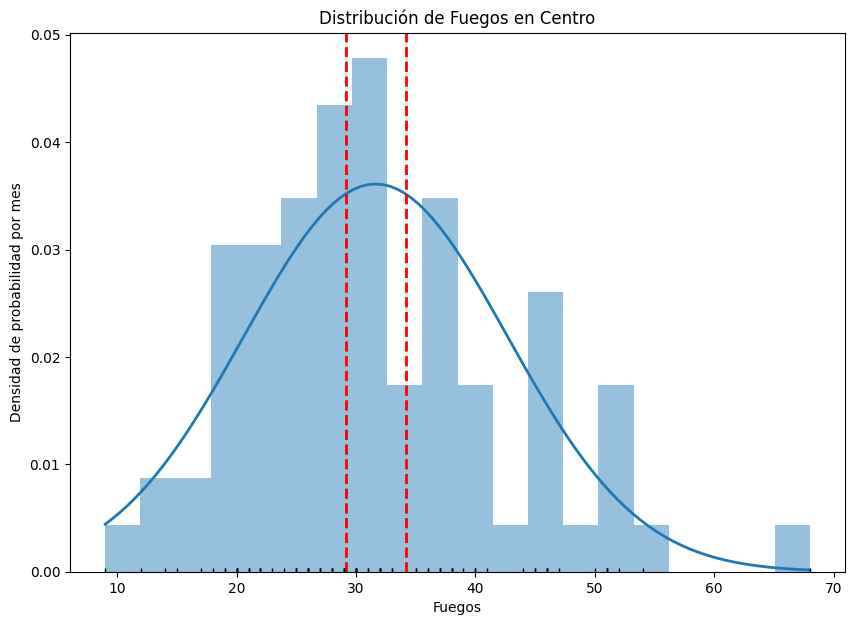

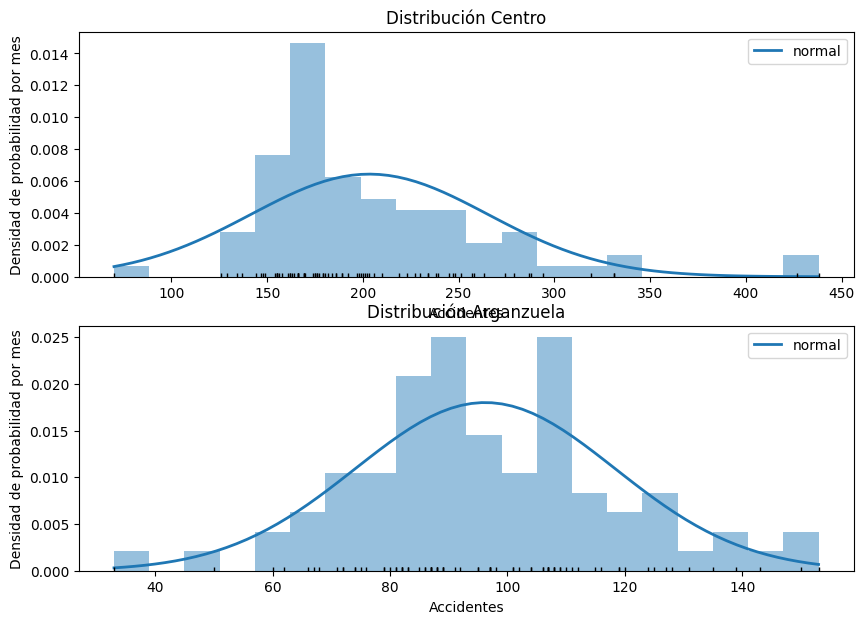

In [2]:
import pandas as pd
import scipy.stats as stats
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

#DATASET
# Cargar el archivo Excel proporcionado
file_path = 'ActuacionesBomberos_2017_2024.xlsx'
data = pd.read_excel(file_path)
data.columns = data.columns.str.lower()


#ESTUDIO SOBRE FUEGOS EN EL CENTRO
# Filtrar datos sobre fuegos del distrito "CENTRO"
centro_fuegos = data[data['distrito'] == 'CENTRO']['fuegos']
print("Fuegos en el centro descripción")
print(centro_fuegos.describe())

# Calcular el intervalo de confianza para la media de fuegos en Centro
mean_centro_fuegos = np.mean(centro_fuegos)
sem_centro_fuegos = stats.sem(centro_fuegos)
ci_centro_fuegos = stats.t.interval(0.95, len(centro_fuegos)-1, loc=mean_centro_fuegos, scale=sem_centro_fuegos)
print(f"95% CI para fuegos en Centro: {ci_centro_fuegos}")

# Mostrar la probabilidad mensual
fig, axs = plt.subplots(figsize=(10, 7))
mu, sigma = stats.norm.fit(centro_fuegos)
x_hat = np.linspace(min(centro_fuegos), max(centro_fuegos), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs.plot(x_hat, y_hat, linewidth=2, label='Ajuste normal')
axs.hist(x=centro_fuegos, density=True, bins=20, color="#3182bd", alpha=0.5)

# Agregar el intervalo de confianza al gráfico
axs.axvline(ci_centro_fuegos[0], color='red', linestyle='--', linewidth=2, label='95% CI')
axs.axvline(ci_centro_fuegos[1], color='red', linestyle='--', linewidth=2)
axs.plot(centro_fuegos, np.full_like(centro_fuegos, -0.01), '|k', markeredgewidth=1)
axs.set_title('Distribución de Fuegos en Centro')
axs.set_xlabel('Fuegos')
axs.set_ylabel('Densidad de probabilidad por mes')

print("///////////////////////////")
#ESTUDIO COMPARATIVO ENTRE EL CENTRO Y ARGANUELA RESPECTO ACCIDENTES
# Filtrar datos de los distritos "CENTRO" y "ARGANZUELA"
centro_total = data[data['distrito'] == 'CENTRO']['total']
arganzuela_total = data[data['distrito'] == 'ARGANZUELA']['total']
centro_total = centro_total.dropna()
arganzuela_total = arganzuela_total.dropna()

# Verificar y mostrar los datos después de llenar valores nulos
print("Centro total accidentes descripcion")
print(centro_total.describe())
print("Arganzuela total accidentes descripcion")
print(arganzuela_total.describe())

#Mostrar la probabilidad mensual
fig, axs = plt.subplots(2, figsize=(10, 7))
mu, sigma = stats.norm.fit(centro_total)
x_hat = np.linspace(min(centro_total), max(centro_total), num=78)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0].hist(x=centro_total, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(centro_total, np.full_like(centro_total, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución Centro')
axs[0].set_xlabel('Accidentes')
axs[0].set_ylabel('Densidad de probabilidad por mes')
axs[0].legend()

mu, sigma = stats.norm.fit(arganzuela_total)
x_hat = np.linspace(min(arganzuela_total), max(arganzuela_total), num=70)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1].hist(x=arganzuela_total, density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(arganzuela_total, np.full_like(arganzuela_total, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución Arganzuela')
axs[1].set_xlabel('Accidentes')
axs[1].set_ylabel('Densidad de probabilidad por mes')
axs[1].legend()

# Contraste de proporciones
count = np.array([centro_total.sum(), arganzuela_total.sum()])
nobs = np.array([len(centro_total), len(arganzuela_total)])
stat, pval = proportions_ztest(count, nobs)
print(f"Z-statistic comparativo entre los accidentes en el centro de madrid y arganzuela: {stat}, P-value: {pval}")

print("///////////////////////////")
#ESTUDIO COMPARATIVO DE LA MEDIA DE FUEGOS DEL CENTRO
# Prueba de una muestra para comparar la media de fuegos con 30
hypothetical_mean = 30
t_stat, p_value = stats.ttest_1samp(centro_fuegos, hypothetical_mean)
print(f"T-statistic de comparacion de la media sobre {hypothetical_mean}: {t_stat}, P-value: {p_value}")


Metodos No Parametricos

In [1]:
from scipy.stats import chi2_contingency, kruskal
import pandas as pd

# Cargar el archivo Excel proporcionado
file_path = 'ActuacionesBomberos_2017_2024.xlsx'
data = pd.read_excel(file_path)

# Convertir las columnas a minúsculas para facilitar el acceso
data.columns = data.columns.str.lower()
data['mes'] = data['mes'].str.lower()
# Crear un diccionario para mapear nombres de meses a números
month_map = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Mapear la columna 'mes' a números
data['mes'] = data['mes'].map(month_map)

# Crear una tabla de contingencia para los tipos de incidentes en Centro
contingencia = pd.crosstab(data[data['distrito'] == 'CENTRO']['mes'], data[data['distrito'] == 'CENTRO']['fuegos'])
chi2, p, dof, expected = chi2_contingency(contingencia)
print(f"Chi2 del Centro segun el mes y los fuegos: {chi2}, P-value: {p}")

# Filtrar datos de algunos distritos
centro_fuegos = data[data['distrito'] == 'CENTRO']['fuegos']
arganzuela_fuegos = data[data['distrito'] == 'ARGANZUELA']['fuegos']
retiro_fuegos = data[data['distrito'] == 'RETIRO']['fuegos']

# Prueba de Kruskal-Wallis
stat, p_value = kruskal(centro_fuegos, arganzuela_fuegos, retiro_fuegos)
print(f"Kruskal-Wallis statistic del CENTRO, ARGANZUELA y RETIRO: {stat}, P-value: {p_value}")


Chi2 del Centro segun el mes y los fuegos: 445.93095238095236, P-value: 0.041980867535568754
Kruskal-Wallis statistic del CENTRO, ARGANZUELA y RETIRO: 150.62304013430628, P-value: 1.9616540131850557e-33


Análisis de serie temporal y Estudio ANOVA

C:\Users\Aitor\AppData\Local\Temp\ipykernel_24492\3788079619.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fuegos_ts = fuegos_ts.fillna(method='ffill')


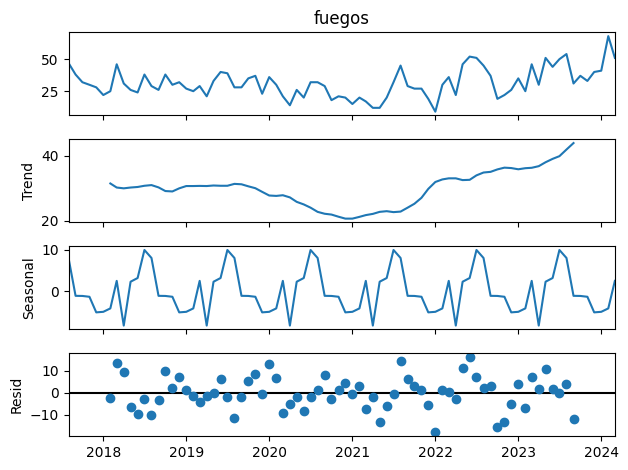

                               SARIMAX Results                                
Dep. Variable:                 fuegos   No. Observations:                   80
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -288.393
Date:                Tue, 02 Jul 2024   AIC                            582.786
Time:                        15:30:29   BIC                            589.894
Sample:                    08-01-2017   HQIC                           585.634
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4126      0.153      2.695      0.007       0.113       0.713
ma.L1         -0.8778      0.086    -10.162      0.000      -1.047      -0.708
sigma2        85.9341     13.061      6.579      0.0

In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# Cargar el archivo Excel proporcionado
file_path = 'ActuacionesBomberos_2017_2024.xlsx'
data = pd.read_excel(file_path)

# Convertir las columnas y los meses a minúsculas para facilitar el acceso
data.columns = data.columns.str.lower()
data['mes'] = data['mes'].str.lower()

# Crear un diccionario para mapear nombres de meses a números
month_map = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Mapeo de la columna 'mes' a números
data['month'] = data['mes'].map(month_map)
data['year']=data['año']

# Creacion de una columna de fecha usando año, mes y un día arbitrario (1)
data['fecha'] = pd.to_datetime(data[['year', 'month']].assign(day=1))

# Filtrado de los datos del distrito "CENTRO" y reindexar por fecha
centro_data = data[data['distrito'] == 'CENTRO'].set_index('fecha')
centro_data = centro_data.resample('MS').asfreq()

# Análisis de serie temporal sobre el número de fuegos
fuegos_ts = centro_data['fuegos']
if fuegos_ts.isnull().any():
    fuegos_ts = fuegos_ts.fillna(method='ffill')
    
decomposition = sm.tsa.seasonal_decompose(fuegos_ts, model='additive')
fig = decomposition.plot()
plt.show()

# Modelo ARIMA
model = sm.tsa.ARIMA(fuegos_ts, order=(1, 1, 1))
results = model.fit()
print(results.summary())

# Hipótesis: Diferencia en el número promedio de incidentes entre diferentes distritos
anova_data = data[['distrito', 'total']]
model = ols('total ~ C(distrito)', data=anova_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
